# Handwriting 
In this code, Fully Connected Feedforward is used. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import SGD

Using TensorFlow backend.


11493376/11490434 [==============================] - 9s 1us/step


9

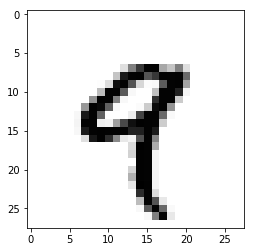

In [5]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

2

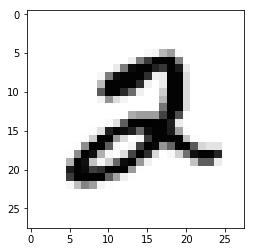

In [7]:
plt.imshow(x0_train[5], cmap='Greys')
y0_train[5]

In [9]:
num_train = len(x0_train)
num_test = len(x0_test)
print('Number of training data:' + str(num_train))
print('Number of test data:' + str(num_test))

Number of training data:60000
Number of test data:10000


# Convert input & output
Input is a vector of 28x28=784.

The output is represented with a 1x10 vector: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] is 3.

In [10]:
x_train = x0_train.reshape(num_train, 28*28)
x_test = x0_test.reshape(num_test, 28*28)

In [11]:
y_train = np.zeros((num_train, 10))
y_test = np.zeros((num_test,10))

In [13]:
for i in range(num_train):
    y_train[i][y0_train[i]] = 1
for i in range(num_test):
    y_test[i][y0_test[i]] = 1

# Model
Using sequential model from Keras. A single input, single output model. 

Use .add() to add a layer 
Dense is a fully connected layer 
The first layer has our input which is 28 * 28
There are two hidden layers, each of which has 500 neurons
The fourth layer is our output, which is a 10 neuron layer

We use MSE (Mean Squred Error) as loss function,
SGD (Stochastic Gradient Descent) as optimisation method

compile function commence the training

In [14]:
model = Sequential()
model.add(Dense(input_dim=28*28, output_dim=500))
model.add(Activation('sigmoid'))
model.add(Dense(output_dim=500))
model.add(Activation('sigmoid'))
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

C:\Users\10\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500, input_dim=784)`
  
C:\Users\10\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500)`
  after removing the cwd from sys.path.
C:\Users\10\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  


train the network

In [15]:
model.fit(x_train, y_train, batch_size=100, epoch=20)

C:\Users\10\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0809 - acc: 0.3813
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0602 - acc: 0.6472
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0434 - acc: 0.7747
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0321 - acc: 0.8446
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0251 - acc: 0.8751
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0210 - acc: 0.8900
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0184 - acc: 0.8999
Epoch 8/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0166 - acc: 0.9069
Epoch 9/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0153 - acc: 0.9126
Epoch 10/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0143 - acc: 0.9172

Review the scores of training

In [16]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 52us/step


In [17]:
print("Total Loss on Testing Set:", score[0])
print("Accuracy of Testing Set:", score[1])

Total Loss on Testing Set: 0.010664690280286595
Accuracy of Testing Set: 0.9332


Pick a random one up from the test set  (no 998) and see if it's correct

In [19]:
result = model.predict_classes(x_test)

In [20]:
no_test = 998

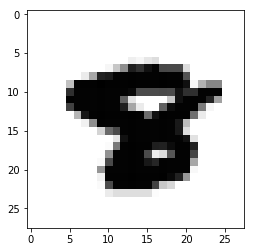

In [21]:
plt.imshow(x0_test[no_test], cmap="Greys")

In [22]:
nn_predict = result[no_test]
print('Our prediction:', nn_predict)

Our prediction: 8


# Save the results
Save the trained model into a json file


In [23]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')